# csvファイルを読み込む

In [6]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

df = [0] * 1
files = ["log_2023_05_31_11_43_40.csv"]

for i in range(1):
    df[i] = pd.read_csv(files[i], 
    names = ["n","y","x0","x1","x2","x3","x4","x5","ymax","x0max","x1max","x2max","x3max","x4max","x5max"],
    encoding="SHIFT-JIS")


# ループ数とBPM値のグラフを描写

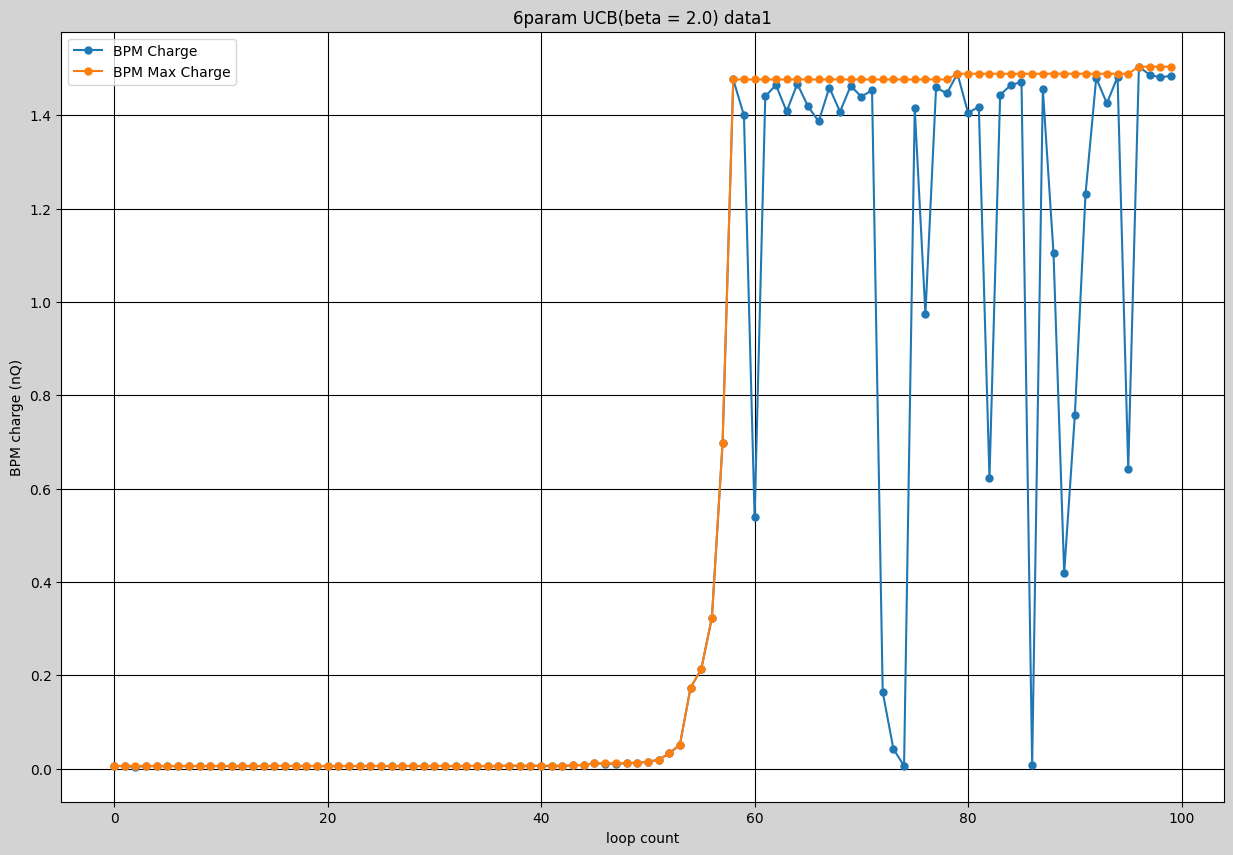

In [7]:
import matplotlib.pyplot as plt

for i in range (1):

    figi,axi = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')

    plt.plot(df[i]["n"],df[i]["y"], marker = "." , markersize = 10,label = "BPM Charge")
    plt.plot(df[i]["n"],df[i]["ymax"], marker = "." , markersize = 10 , label = "BPM Max Charge")

    axi.grid(which = "major" , color = "black" , linestyle = "-")
    axi.set_xlabel("loop count")
    axi.set_ylabel("BPM charge (nQ)")
    axi.legend()
    axi.set_title('6param UCB(beta = 2.0) data' + str(i+1))


# 各最大値を比較

Text(0.5, 1.0, 'traveldistance')

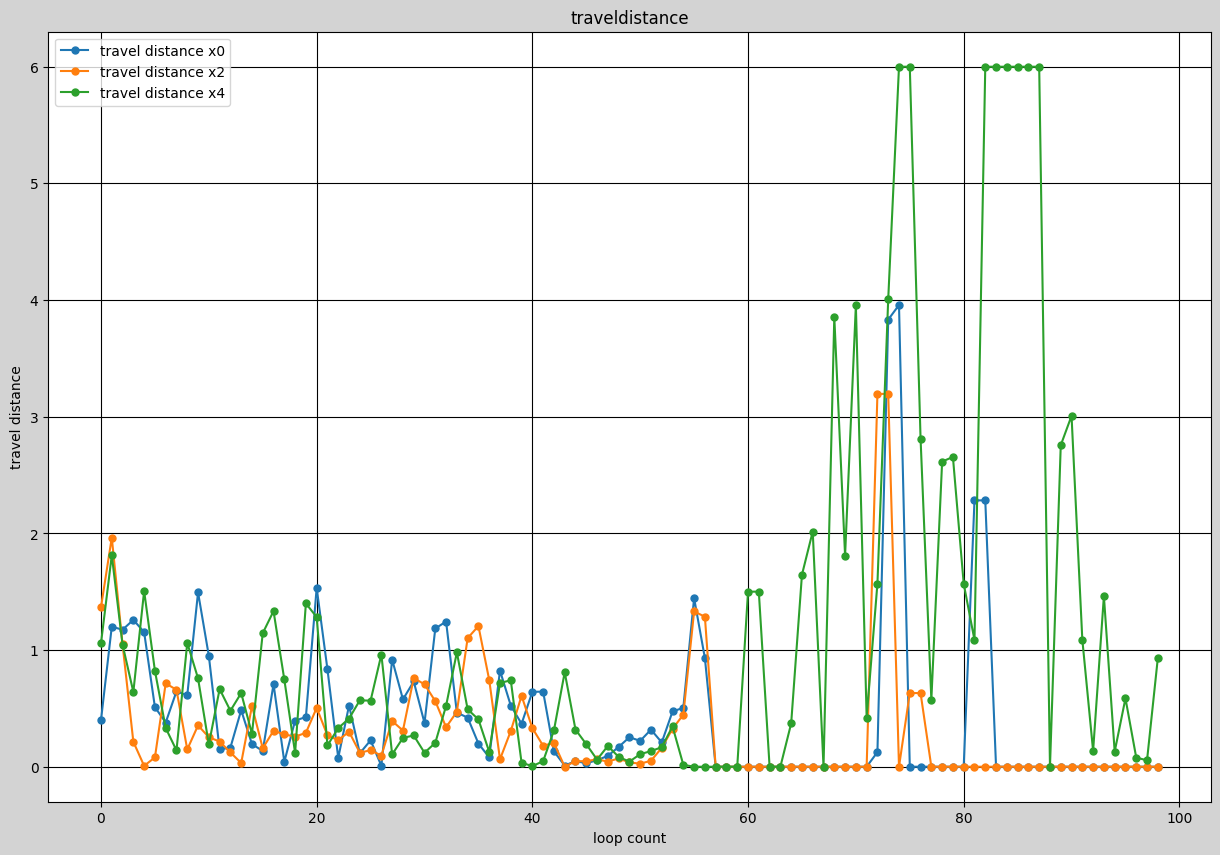

In [9]:
fig_t,ax_t = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')

xx = []
x = [] 
a = []

numbers = [i for i in range(0, 99)]

for k in range (1): #5回の試行
    for j in range (6): #パラメータの指定
        for i in range (99): #セルの列数

            a.append(abs(df[k]["x" + str(j)][i+1] - df[k]["x" + str(j)][i]))
        
        x.append(a)
        a = []
        
    xx.append(x)
    x = []



mean_qp = []
mean_p = []
b = 0

for p in range (6):
    for q in range (99): 
        for m in range (1):
            b = b + xx[m][p][q]
        
        mean_qp.append(b/1)
        b = 0
        
    mean_p.append(mean_qp)
    mean_qp = []


for n in (0,2,4):
    
    plt.plot(numbers,mean_p[n], marker = "." , markersize = 10 , label = "travel distance x" + str(n))





ax_t.grid(which = "major" , color = "black" , linestyle = "-")
ax_t.set_xlabel("loop count")
ax_t.set_ylabel("travel distance")
ax_t.legend()
ax_t.set_title('traveldistance')

# 平均を描写